<h1>EdNet - Optimize Student Performance: Data Wrangling</h1>

Project GitHub: https://github.com/premonish/EdNet<p>


<b>EdNet is composed of a total of 131,441,538 interactions collected from 784,309 students of Santa since 2017.</b>

"Dataset:
As we said, there are four datasets named KT1, KT2, KT3, and KT4 with different extents. Here's common features of these datasets:

The whole dataset is divided by students: {user_id}.csv only contains {user_id}'s interactions.
The timestamps are different from the real values, which are modified (shifted by fixed values) due to security issues.
Download links
EdNet-KT1 : bit.ly/ednet_kt1
EdNet-KT2 : bit.ly/ednet-kt2
EdNet-KT3 : bit.ly/ednet-kt3
EdNet-KT4 : bit.ly/ednet-kt4
Contents : bit.ly/ednet-content
KT1

The whole dataset is divided by students: {user_id}.csv only contains {user_id}'s interactions."
    
SOURCE: https://github.com/riiid/ednet.git

In [1]:
# I get by with a little help from my friends
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import glob

In [2]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-KT4/KT4

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\raw\EdNet-KT4\KT4


In [3]:
# file locations
prefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'
folder_1 = prefix + 'KT1/KT1/'
folder_2 = prefix + 'KT2/KT2/'
folder_3 = prefix + 'KT3/KT3/'
folder_4 = prefix + 'KT4/KT4/'
questions = prefix + 'Contents/contents/questions.csv'
questions_df = pd.read_csv(questions)

# create a list of 
csv_files = glob.glob('*.csv')

In [5]:
csv_files[54]

'u10096.csv'

In [8]:
# choose file # from csv_files
z = 234

# create pathname
# create pandas dataframe
# extract user_id from filename and assign user_id as value to column[0], 'user_id'
one = pd.read_csv(folder_1 + csv_files[z])
one.insert(0, 'user_id', csv_files[z].split('.')[0])

# add desired columns and fill with '0'
one['action_type'] = 0
one['item_id'] = 0
one['source'] = 0
one['platform'] = 0
one['cursor_time'] = 0

# repeat process for 3 related csv files per user 
two = pd.read_csv(folder_2 + csv_files[z]) 
two.insert(0, 'user_id', csv_files[z].split('.')[0])

three = pd.read_csv(folder_3 + csv_files[z])
three.insert(0, 'user_id', csv_files[z].split('.')[0])

four = pd.read_csv(folder_4 + csv_files[z])
four.insert(0, 'user_id', csv_files[z].split('.')[0])

# concatenate into a 'tall' dataframe
df1 = pd.concat([one, two, three, four])
df1.tail(10)

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time
452,u10366,1572469607391,NaN,NaN,NaN,NaN,quit,e8001,sprint,mobile,NaN
453,u10366,1572469607437,NaN,NaN,NaN,NaN,enter,b8002,sprint,mobile,NaN
454,u10366,1572469607913,NaN,NaN,NaN,NaN,play_audio,b8002,sprint,mobile,0.0
455,u10366,1572469630260,NaN,NaN,NaN,NaN,pause_audio,b8002,sprint,mobile,20743.0
456,u10366,1572469631007,NaN,NaN,c,NaN,respond,q10949,sprint,mobile,NaN
457,u10366,1572469634122,NaN,NaN,NaN,NaN,submit,b8002,sprint,mobile,NaN
458,u10366,1572469634160,NaN,NaN,NaN,NaN,enter,e8002,sprint,mobile,NaN
459,u10366,1572469670398,NaN,NaN,NaN,NaN,play_audio,b8002,sprint,mobile,0.0
460,u10366,1572469686994,NaN,NaN,NaN,NaN,pause_audio,b8002,sprint,mobile,16485.0
461,u10366,1572469691101,NaN,NaN,NaN,NaN,quit,e8002,sprint,mobile,NaN


In [30]:
# inner join dataframes on 'question_id' columns
KTMQt_u1 = pd.merge(left=df1, right=questions_df, left_on='question_id', right_on='question_id')

# create a 'correct' column
KTMQt_u1['correct'] = 0

# loop - if user answers == correct answer, then KTMQt_u1['correct'][_]= 1
length_df = KTMQt_u1['user_id'].count()
count = 0
for i in range(length_df):
    if KTMQt_u1['user_answer'][count] == KTMQt_u1['correct_answer'][count] :
        KTMQt_u1['correct'][count] = 1
    count+=1
    
KTMQt_u1.tail(5)

C:\Users\Prem\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct
117,u10366,1572256210000,99.0,q10948,c,23000.0,0,0,0,0,0.0,b8001,e8001,c,1,14;2;183,1528106443974,1
118,u10366,1572469559675,109.0,q10948,c,23000.0,0,0,0,0,0.0,b8001,e8001,c,1,14;2;183,1528106443974,1
119,u10366,1572256283000,100.0,q10949,c,24000.0,0,0,0,0,0.0,b8002,e8002,c,1,10;7;184,1528106446313,1
120,u10366,1572469632806,110.0,q10949,c,24000.0,0,0,0,0,0.0,b8002,e8002,c,1,10;7;184,1528106446313,1
121,u10366,1572256366000,101.0,q11127,c,24000.0,0,0,0,0,0.0,b8180,e8180,c,1,18;7;181,1514962202235,1


In [33]:
# create new 'score' column
total_u1 = KTMQt_u1['correct'].count()
correct_u1 = KTMQt_u1[KTMQt_u1_clean['correct'] == 1].count()
score = correct_u1[0]/total_u1

#print(score)
KTMQt_u1['score'] = score
score

C:\Users\Prem\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.5409836065573771

In [20]:
KTMQt_u1['solving_id'].value_counts().count()

110

In [21]:
KTMQt_u1['question_id'].value_counts().count()

92

In [22]:
KTMQt_u1['bundle_id'].value_counts().count()

80

In [24]:
time_sec = KTMQt_u1['elapsed_time'].mean()

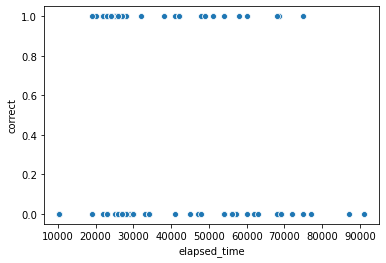

In [25]:
sns.scatterplot(x='elapsed_time', y='correct', data=KTMQt_u1)

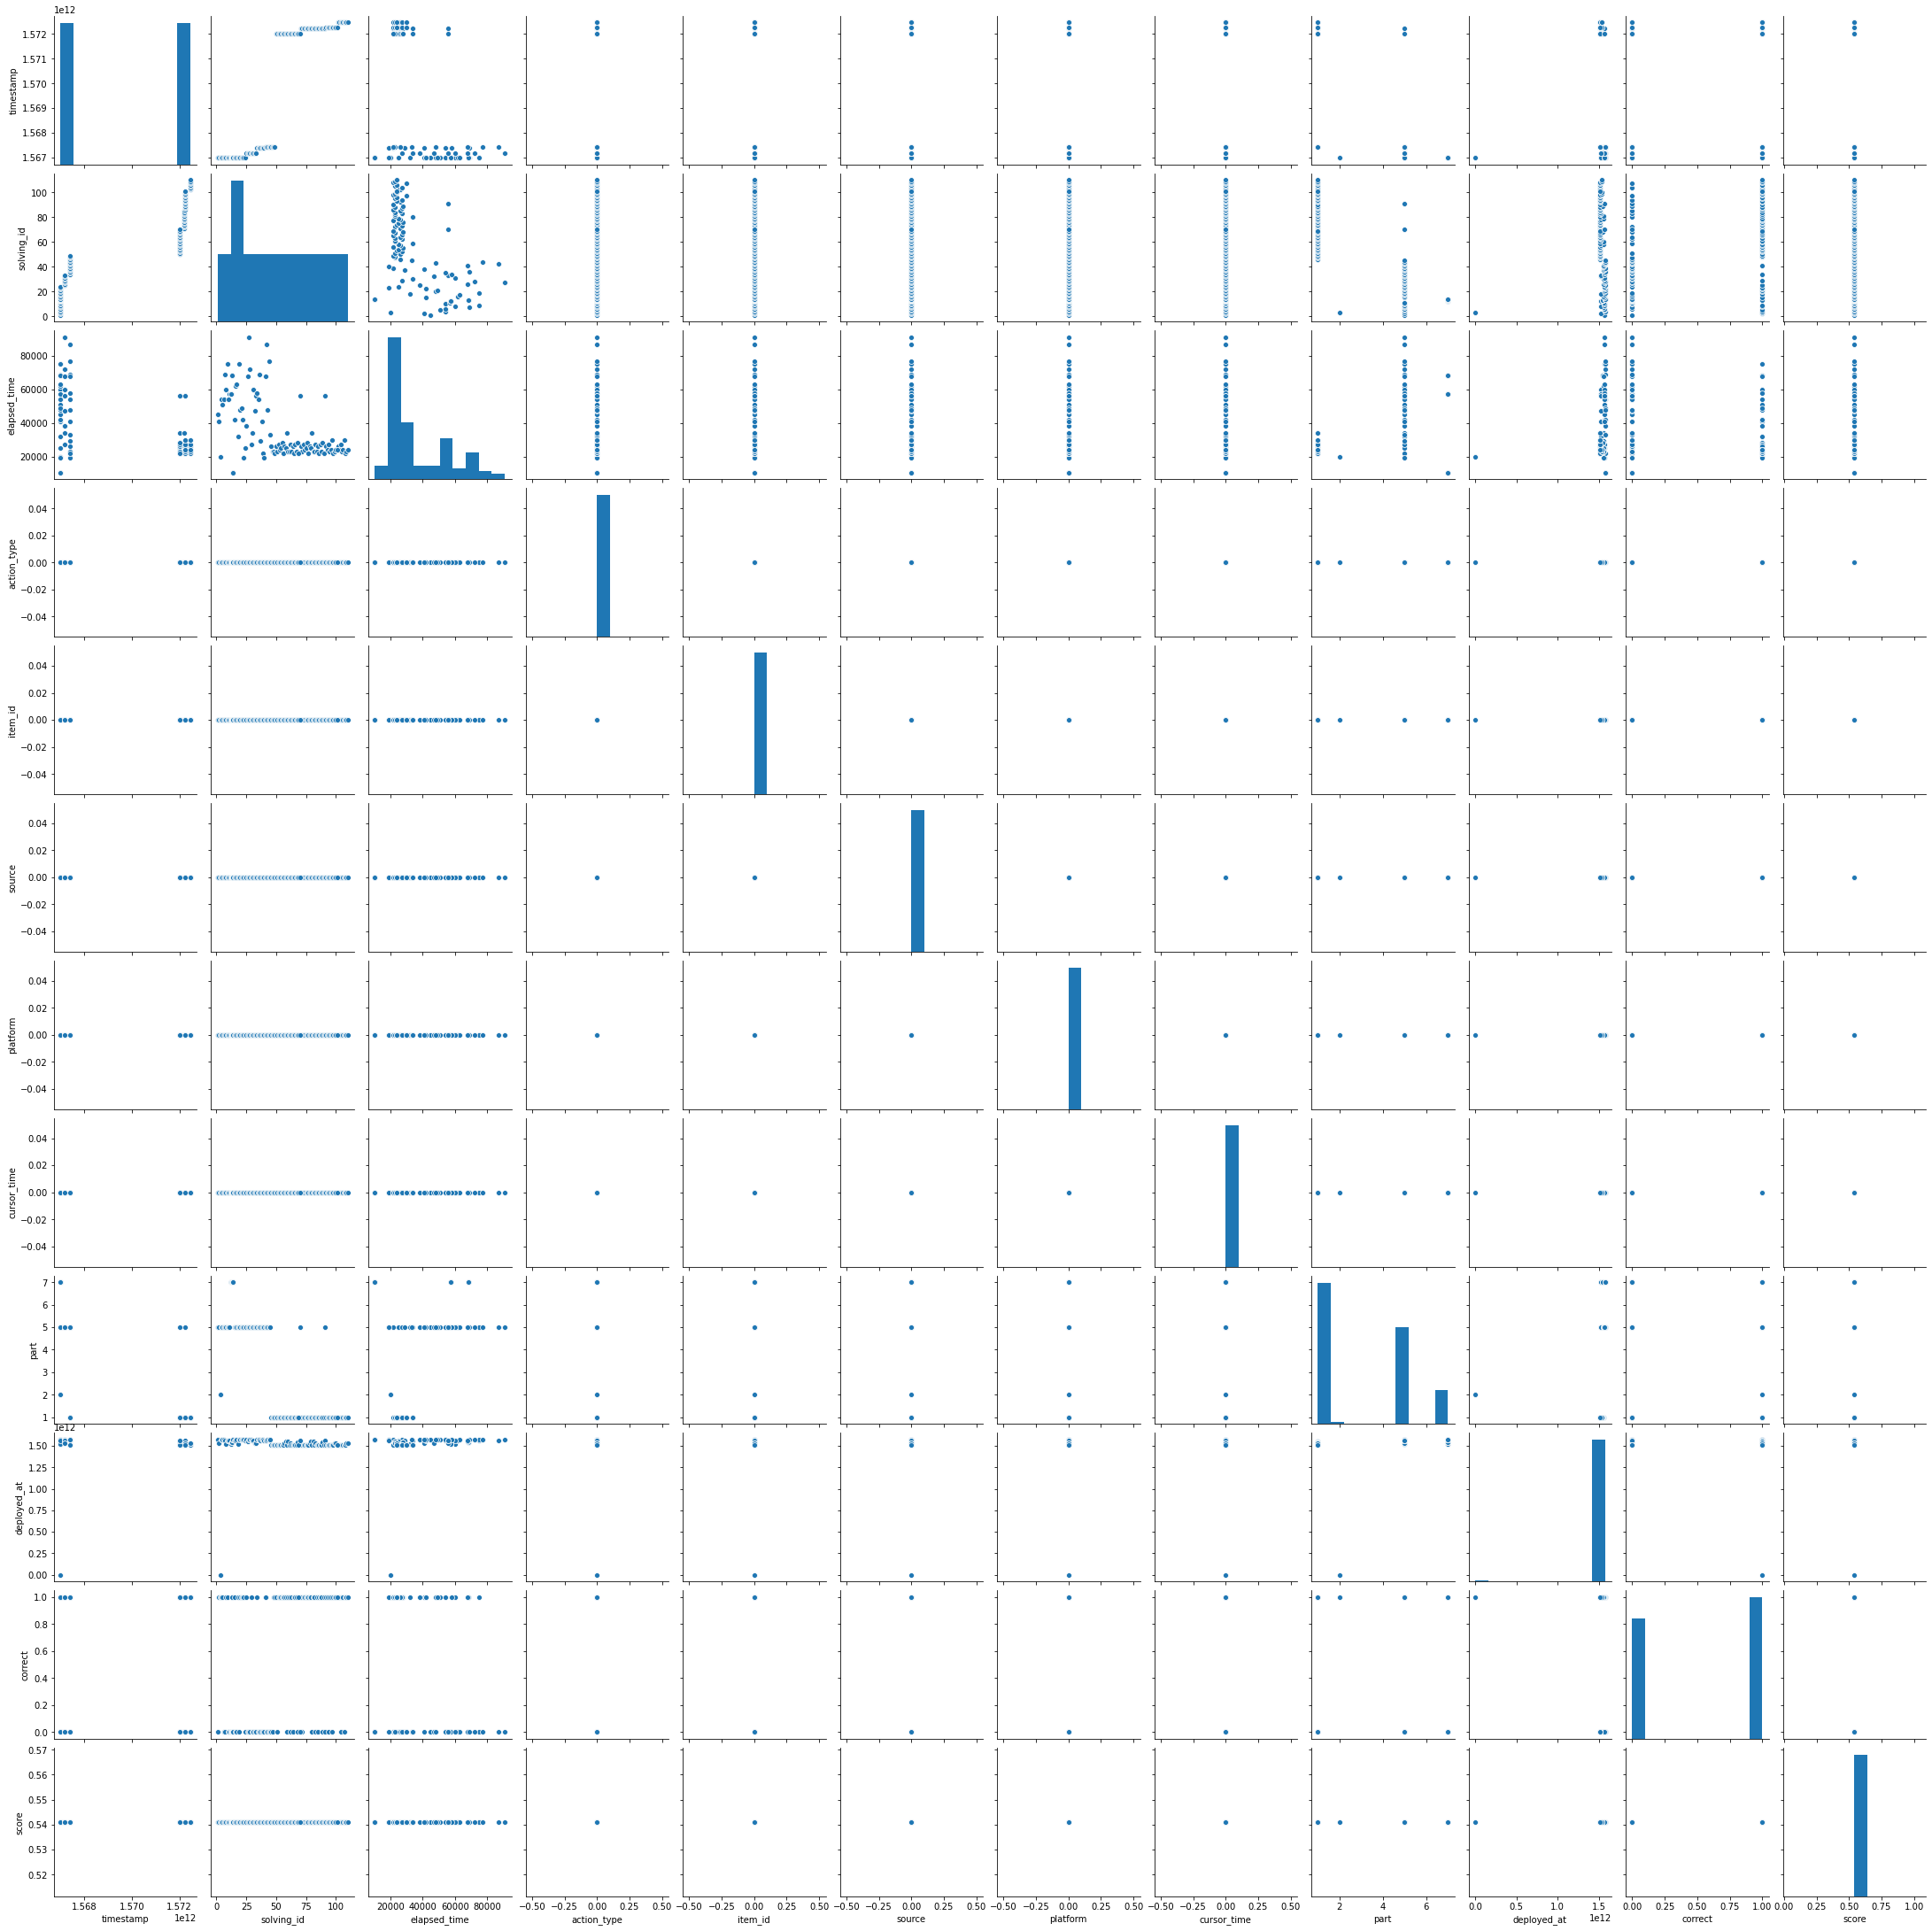

In [26]:
sns.pairplot(KTMQt_u1)

<h1>Column Label Metadata</h1> <p>
<b> timestamp </b> is the moment the question was given, represented as Unix timestamp in milliseconds. <p>
<b> solving_id </b> represents each learning session of students corresponds to each bundle. It is a form of single integer, starting from 1.<p>
<b> question_id </b>is the ID of the question that given to student, which is a form of q{integer}. <p>
<b> user_answer </b>is the answer that the student submitted, recorded as a character between a and d inclusively.<p>
<b> elapsed_time </b> is the time that the students spends on each question in milliseconds.

In [35]:
# Data Types
KTMQt_u1.dtypes

user_id            object
timestamp           int64
solving_id        float64
question_id        object
user_answer        object
elapsed_time      float64
action_type        object
item_id            object
source             object
platform           object
cursor_time       float64
bundle_id          object
explanation_id     object
correct_answer     object
part                int64
tags               object
deployed_at         int64
correct             int64
score             float64
dtype: object

In [34]:
# Description of the Columns 
KTMQt_u1.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,122.0,1.569655e+12,2.550775e+09,1.566985e+12,1.566991e+12,1.569705e+12,1.572221e+12,1.572470e+12
solving_id,122.0,5.131967e+01,3.283549e+01,1.000000e+00,1.925000e+01,4.950000e+01,7.975000e+01,1.100000e+02
elapsed_time,122.0,3.688525e+04,1.886078e+04,1.040000e+04,2.300000e+04,2.700000e+04,5.400000e+04,9.100000e+04
cursor_time,122.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
part,122.0,3.155738e+00,2.339105e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,7.000000e+00
deployed_at,122.0,1.525020e+12,1.411842e+11,-1.000000e+00,1.514962e+12,1.526634e+12,1.565337e+12,1.572414e+12
correct,122.0,5.409836e-01,5.003724e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
score,122.0,5.409836e-01,1.003321e-15,5.409836e-01,5.409836e-01,5.409836e-01,5.409836e-01,5.409836e-01


In [36]:
KTMQt_u1['user_id'].value_counts(normalize=True)

u10366    1.0
Name: user_id, dtype: float64

In [37]:
KTMQt_u1['timestamp'].value_counts(normalize=True)

1566985481289    0.008197
1567159110396    0.008197
1572256139000    0.008197
1567383445222    0.008197
1572469488870    0.008197
                   ...   
1572220370442    0.008197
1572220795511    0.008197
1572468830070    0.008197
1567401708148    0.008197
1572469158327    0.008197
Name: timestamp, Length: 122, dtype: float64

In [38]:
KTMQt_u1['solving_id'].value_counts(normalize=True)

14.0    0.040984
12.0    0.040984
13.0    0.040984
42.0    0.008197
31.0    0.008197
          ...   
84.0    0.008197
64.0    0.008197
85.0    0.008197
65.0    0.008197
1.0     0.008197
Name: solving_id, Length: 110, dtype: float64

In [39]:
KTMQt_u1['question_id'].value_counts(normalize=True)

q10961    0.016393
q4516     0.016393
q11070    0.016393
q11179    0.016393
q11095    0.016393
            ...   
q5052     0.008197
q5484     0.008197
q165      0.008197
q4886     0.008197
q7508     0.008197
Name: question_id, Length: 92, dtype: float64

In [40]:
KTMQt_u1['user_answer'].value_counts(normalize=True)

b    0.286885
d    0.270492
a    0.237705
c    0.204918
Name: user_answer, dtype: float64

In [42]:
# KTMQt_u1['elapsed_time'].value_counts(normalize=True)

In [43]:
KTMQt_u1['action_type'].value_counts(normalize=True)

0    1.0
Name: action_type, dtype: float64

In [44]:
KTMQt_u1['item_id'].value_counts(normalize=True)

0    1.0
Name: item_id, dtype: float64

In [45]:
KTMQt_u1['source'].value_counts(normalize=True)

0    1.0
Name: source, dtype: float64

In [46]:
KTMQt_u1['platform'].value_counts(normalize=True)

0    1.0
Name: platform, dtype: float64

In [47]:
KTMQt_u1['cursor_time'].value_counts(normalize=True)

0.0    1.0
Name: cursor_time, dtype: float64

In [48]:
# range of values
print('timestamp: '); print(df1['timestamp'].min()); print(df1['timestamp'].max()), print('---')

print('elapsed_time: '); print(df1['elapsed_time'].min()); print(df1['elapsed_time'].max()); print('---')

print('cursor_time: '); print(df1['cursor_time'].min()); print(df1['cursor_time'].max()); print('---')

timestamp: 
1566955895756
1572469691101
---
elapsed_time: 
10400.0
91000.0
---
cursor_time: 
0.0
23435.0
---


In [49]:
KTMQt_u1.isnull().sum()

user_id           0
timestamp         0
solving_id        0
question_id       0
user_answer       0
elapsed_time      0
action_type       0
item_id           0
source            0
platform          0
cursor_time       0
bundle_id         0
explanation_id    0
correct_answer    0
part              0
tags              0
deployed_at       0
correct           0
score             0
dtype: int64

In [54]:
cd ..

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\raw\EdNet-KT4


In [57]:
cd ../../../..

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER


In [58]:
cd EdNet\data

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data


In [59]:
cd processed

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\processed


In [61]:
# create a csv of the new dataframe
output = '_'+ str(z) + '.csv'
KTMQt_u1.to_csv(output) 

Data Cleaning: Clean up the data in order to prepare it for the next steps of
your project.

NA or missing values<p>
Duplicates

In [50]:
from pandas_profiling import ProfileReport
prof = ProfileReport(KTMQt_u1)
prof.to_notebook_iframe()
prof.to_file(output_file='./KTMQt_u1.html')